*PROJECT ONE*
-----------------
PART 2: Analysis

Rawan Abdellah 

Question 1: Replication 
-----------------
//we have matched the nasa table with space weather table returning 
all best matches and replicated those matches in a new dataframe 
then calssified them according to the top 50 solar flares.//

We took a copy from part 1 step 4 to be able to edit on it:

In [2]:

from bs4 import BeautifulSoup
import requests
import pandas as pd
from dateutil.parser import parse
import numpy as np
import datetime
import re
textLines=[]
textCol=[]
source = requests.get('https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html').text
soup = BeautifulSoup(source, 'html')

words =soup.get_text()

for x  in words.split('\n'):
    textLines.append(x)
    
for x  in textLines[15:-4]:
    textCol.append(x)

a = []
b = []
c = []
d = []
e = []
f = []
g = []
h = []
i = []
j = []
k = []
l = []
m = []
n = []
o = []
p = []
q = []

for row in textCol:
    cell = row.split()
    a.append(cell[0])
    b.append(cell[1])
    c.append(cell[2])
    if cell[3] == '24:00': 
        d.append('00:00')
    else:
        d.append(cell[3])
    if cell[4] == '????':
        e.append(np.nan)
    else:
        e.append(float(cell[4]))
    if cell[5] == '????':
        f.append(np.nan)
    else:
        f.append(float(cell[5]))  #float: to have the numbers on df as a float numbers
    if cell[6] == '------':
        g.append('NaN')
    else:
        g.append(cell[6])
    if cell[7] == '-----':
        h.append('NaN')
    else:
        h.append(cell[7])
    if cell[8] == '----':
        i.append(np.nan)
    else:
        i.append(cell[8])
    if cell[9] == '--/--':
        j.append('NaN')
    else:
        j.append(cell[9])
    if cell[10] == '--:--':
        k.append('NaN')
    elif cell[10] == '24:00': 
        k.append('00:00')
    else:
        k.append(cell[10])
    if cell[11] == 'Halo' :
        p.append('True')    #to be added on is_halo col
        l.append('NaN')
    elif cell[11] == '----':
        p.append('False')   #to be added on is_halo col
        l.append(np.nan)
    else:
        p.append('False')
        l.append(float(cell[11]))
    if cell[12] == '----' :
        m.append('NaN')
        q.append(' ')    #to be added on widLower col
    elif cell[12] == '---':
        m.append('NaN')
        q.append(' ')
    elif '>' in cell[12] :
        m.append(cell[12])
        q.append('lower')  #to be added on widLower col
    else:
        m.append(cell[12])
        q.append(' ')    #to be added on widLower col
    if cell[13] == '----':
        n.append('NaN')
    else:
        n.append(cell[13])
    o.append(cell[14])
    




In [3]:
#change the dates and time format

oldA=[datetime.datetime.strptime(x,'%Y/%m/%d') for x in a]

newA= [d.strftime('%m-%d-%Y') for d in oldA]
#--------------------------------------------------
startYear=[x.year for x in oldA]

startYearStr=[str(x) for x in startYear]
#--------------------------------------------------
oldC=[datetime.datetime.strptime(x,'%m/%d') for x in c]

newC= [d.strftime('%m-%d-') for d in oldC]
#--------------------------------------------------
oldB=[datetime.datetime.strptime(x,'%H:%M') for x in b]

newB= [d.strftime('%X') for d in oldB]
#--------------------------------------------------

oldD=[datetime.datetime.strptime(x,'%H:%M') for x in d]

newD= [d.strftime('%X') for d in oldD]
#--------------------------------------------------
#oldJ=[datetime.datetime.strptime(x,'%Y/%m/%d') for x in j]

#newJ= [d.strftime('%m-%d-%Y') for d in oldJ]
#--------------------------------------------------
#oldK=[]
#for x in k:
    #if x == 'NaN':
       # oldK.append(np.drop.nan)
  #  else:
   #     oldK.append(datetime.datetime.strptime(x,'%H:%M'))
        #newK= x.strftime('%X') 

        
#newK= [d.strftime('%X') for d in oldK]
#--------------------------------------------------


In [4]:
df = pd.DataFrame({'Start_date':newA,'Start_time':newB, 'End_date':newC,'start_year':startYearStr,'End_time':newD, 'start_fre':e, 'end_fre':f,
                   'flare_loc':g,'flare_region':h,'importance':i,'CME_date':j,'CME_time':k,'CPA':l,'width':m,
                   'speed':n,'plots':o,'is_halo':p,'widLower':q})
#----------------------------------------------------------------------------------------------
#marge columns 

df2=pd.DataFrame()

df2['Start_date_time'] = df[['Start_date', 'Start_time']].apply(lambda x: '  '.join(x), axis=1)
df2['End_date_time'] = df[['End_date','start_year','End_time']].apply(lambda x: '  '.join(x), axis=1)
df2['CME_date_time']  = df[['CME_date', 'CME_time']].apply(lambda x: '  '.join(x), axis=1)




In [5]:
data = df['importance']
tester=data.str.contains('X')
num_x=[]

for pop,j in enumerate(tester):
    if j == True:
        data=data.str.replace('X',' ')
        num_x.append(data[pop])
    else: num_x.append('0')

#-----------------------------------------    
nasa=[]
for x in num_x:
    nasa.append(float(x))


we added here a 'Top_nasa' column 

Note: scroll right ===>

In [6]:

df3 = pd.DataFrame({'start_fre':e, 'end_fre':f,
                   'flare_loc':g,'flare_region':h,'importance':i,'CPA':l,'width':m,
                   'speed':n,'plots':o,'is_halo':p,'widLower':q,'Top_nasa':nasa})




#----------------------------------------------------------------------------------------------
df4= pd.concat([df2,df3], axis=1)

#removing > from width
df4['width'] = df4['width'].str.replace('>','')
df4

,Start_date_time,End_date_time,CME_date_time,start_fre,end_fre,flare_loc,flare_region,importance,CPA,width,speed,plots,is_halo,widLower,Top_nasa
0,04-01-1997 14:00:00,04-01- 1997 14:15:00,04/01 15:18,8000.0,4000.0,S25E16,8026,M1.3,74,79,312,PHTX,False,,0.0
1,04-07-1997 14:30:00,04-07- 1997 17:30:00,04/07 14:27,11000.0,1000.0,S28E19,8027,C6.8,NaN,360,878,PHTX,True,,0.0
2,05-12-1997 05:15:00,05-14- 1997 16:00:00,05/12 05:30,12000.0,80.0,N21W08,8038,C1.3,NaN,360,464,PHTX,True,,0.0
3,05-21-1997 20:20:00,05-21- 1997 22:00:00,05/21 21:00,5000.0,500.0,N05W12,8040,M1.3,263,165,296,PHTX,False,,0.0
4,09-23-1997 21:53:00,09-23- 1997 22:16:00,09/23 22:02,6000.0,2000.0,S29E25,8088,C1.4,133,155,712,PHTX,False,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,07-23-2017 05:27:00,07-23- 2017 06:12:00,07/23 04:48,4400.0,900.0,BACK,NaN,NaN,NaN,360,1848,PHTX,True,,0.0
513,09-04-2017 20:27:00,09-05- 2017 04:54:00,09/04 20:12,14000.0,210.0,S10W12,12673,M5.5,NaN,360,1418,PHTX,True,,0.0
514,09-06-2017 12:05:00,09-07- 2017 08:00:00,09/06 12:24,16000.0,70.0,S08W33,12673,X9.3,NaN,360,1571,PHTX,True,,9.3
515,09-10-2017 16:02:00,09-11- 2017 06:50:00,09/10 16:00,16000.0,150.0,S09W92,NaN,X8.3,NaN,360,3163,PHTX,True,,8.3



we dropped here all rows less 
than 1.9 we dont need them then 
sort the first 50 rows.


In [7]:

drops = df4[ df4['Top_nasa'] < 1.9 ].index
df4.drop(drops , inplace=True)

df4=df4.nlargest(50, "Top_nasa")
print(len(df4))

50



this to get spaceWeather data,
x_class column and removing X from 
it in order to make it sortable


In [8]:

source2 = requests.get('https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares').text
soup2 = BeautifulSoup(source2, 'html')
header = soup2.find('table', class_ = 'table table-striped table-responsive-md')
b1 = []
b2 = []
for row in header.find_all('tr')[1:51]:
    cell = row.find_all('td')
    b1.append(cell[0].text)
    b2.append(cell[1].text)
df5 = pd.DataFrame({'rank':b1,'x_calss':b2})
data = df5['x_calss']
tester=data.str.contains('X')
xClass=[]
data=data.str.replace('X','')
data=data.str.replace('+','')
for i,j in enumerate(tester):
    if j == True:
        xClass.append(data[i])
    
print(b1)
list_space = []
for change in xClass:
    list_space.append(float(change))
    
df5=pd.DataFrame({'x_class':list_space})


['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50']



this function to compare between
spaceWeather and Nasa .


In [9]:
def closest(lst, K): 
      
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]- K))]
results = []
for static in list_space:
        value = closest(nasa, static)
        results.append(value)
len(results)

50


this dataframe to concat between
x_class and Top50Nasa .



this loop to append the matched 
rows on a new df to show them.

Note: scroll right ===>

In [11]:
res = []
for match in results:
    res.append(df4.loc[df4.Top_nasa == match, :])
new_df = pd.DataFrame()
new_df=new_df.append(res)

new_df=new_df.nlargest(50,'Top_nasa')
new_df=new_df.drop(new_df.index[:-50])
#print(len(new_df))
new_df


,Start_date_time,End_date_time,CME_date_time,start_fre,end_fre,flare_loc,flare_region,importance,CPA,width,speed,plots,is_halo,widLower,Top_nasa
240,11-04-2003 20:00:00,11-04- 2003 00:00:00,11/04 19:54,10000.0,200.0,S19W83,10486,X28.,NaN,360,2657,PHTX,True,,28.0
117,04-02-2001 22:05:00,04-03- 2001 02:30:00,04/02 22:06,14000.0,250.0,N19W72,9393,X20.,261,244,2505,PHTX,False,,20.0
233,10-28-2003 11:10:00,10-29- 2003 00:00:00,10/28 11:30,14000.0,40.0,S16E08,10486,X17.,NaN,360,2459,PHTX,True,,17.0
233,10-28-2003 11:10:00,10-29- 2003 00:00:00,10/28 11:30,14000.0,40.0,S16E08,10486,X17.,NaN,360,2459,PHTX,True,,17.0
126,04-15-2001 14:05:00,04-16- 2001 13:00:00,04/15 14:06,14000.0,40.0,S20W85,9415,X14.,245,167,1199,PHTX,False,,14.0
234,10-29-2003 20:55:00,10-29- 2003 00:00:00,10/29 20:54,11000.0,500.0,S15W02,10486,X10.,NaN,360,2029,PHTX,True,,10.0
8,11-06-1997 12:20:00,11-07- 1997 08:30:00,11/06 12:10,14000.0,100.0,S18W63,8100,X9.4,NaN,360,1556,PHTX,True,,9.4
514,09-06-2017 12:05:00,09-07- 2017 08:00:00,09/06 12:24,16000.0,70.0,S08W33,12673,X9.3,NaN,360,1571,PHTX,True,,9.3
328,12-05-2006 10:50:00,12-05- 2006 20:00:00,NaN NaN,14000.0,250.0,S07E68,10930,X9.0,NaN,NaN,NaN,PHTX,False,,9.0
515,09-10-2017 16:02:00,09-11- 2017 06:50:00,09/10 16:00,16000.0,150.0,S09W92,NaN,X8.3,NaN,360,3163,PHTX,True,,8.3


Question 2: Integration 
---------------------------------
this to compare top 50 in Nasa
with top 50 in spaceWeather then
return the rank if it matched.

In [10]:
df6 = pd.DataFrame({'Top50_nasa':results}) 
df6=pd.concat([df6,df5], axis=1)

print(len(df6))

50


In [12]:

comparison_column = np.where(df6["Top50_nasa"] == df5["x_class"], df5["x_class"].index, False)
print(comparison_column)


[ 0  1  0  3  0  5  6  7  8  9  0 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28  0 30 31 32 33 34 35 36 37 38 39 40  0 42 43 44 45 46 47
 48 49]



this is  to concat the rank
with the dataset.


In [14]:

new_df['Ranks'] = comparison_column

new_df


,Start_date_time,End_date_time,CME_date_time,start_fre,end_fre,flare_loc,flare_region,importance,CPA,width,speed,plots,is_halo,widLower,Top_nasa,Ranks
240,11-04-2003 20:00:00,11-04- 2003 00:00:00,11/04 19:54,10000.0,200.0,S19W83,10486,X28.,NaN,360,2657,PHTX,True,,28.0,0
117,04-02-2001 22:05:00,04-03- 2001 02:30:00,04/02 22:06,14000.0,250.0,N19W72,9393,X20.,261,244,2505,PHTX,False,,20.0,1
233,10-28-2003 11:10:00,10-29- 2003 00:00:00,10/28 11:30,14000.0,40.0,S16E08,10486,X17.,NaN,360,2459,PHTX,True,,17.0,0
233,10-28-2003 11:10:00,10-29- 2003 00:00:00,10/28 11:30,14000.0,40.0,S16E08,10486,X17.,NaN,360,2459,PHTX,True,,17.0,3
126,04-15-2001 14:05:00,04-16- 2001 13:00:00,04/15 14:06,14000.0,40.0,S20W85,9415,X14.,245,167,1199,PHTX,False,,14.0,0
234,10-29-2003 20:55:00,10-29- 2003 00:00:00,10/29 20:54,11000.0,500.0,S15W02,10486,X10.,NaN,360,2029,PHTX,True,,10.0,5
8,11-06-1997 12:20:00,11-07- 1997 08:30:00,11/06 12:10,14000.0,100.0,S18W63,8100,X9.4,NaN,360,1556,PHTX,True,,9.4,6
514,09-06-2017 12:05:00,09-07- 2017 08:00:00,09/06 12:24,16000.0,70.0,S08W33,12673,X9.3,NaN,360,1571,PHTX,True,,9.3,7
328,12-05-2006 10:50:00,12-05- 2006 20:00:00,NaN NaN,14000.0,250.0,S07E68,10930,X9.0,NaN,NaN,NaN,PHTX,False,,9.0,8
515,09-10-2017 16:02:00,09-11- 2017 06:50:00,09/10 16:00,16000.0,150.0,S09W92,NaN,X8.3,NaN,360,3163,PHTX,True,,8.3,9



we have chosen the first plot 
idea, we plot the start/end 
frequencies in the top 50 
classification in Nasa.


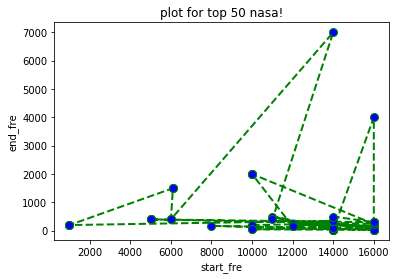

In [19]:
import matplotlib.pyplot as plt 
  

x = []
for i in new_df['start_fre']:
    x.append(i)

y = []
for i in new_df['end_fre']:
    y.append(i)
    

plt.plot(x, y, color='green', linestyle='dashed', linewidth = 2, 
         marker='o', markerfacecolor='blue', markersize=8) 

   
plt.xlabel('start_fre') 
 
plt.ylabel('end_fre') 
  

plt.title('plot for top 50 nasa!') 
  

plt.show() 